In [1]:
## generates figures demonstrating how the time grid interpolation works

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
import scipy
from scipy.integrate import cumtrapz

import trfp
import gm2
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

matplotlib.rc('xtick', labelsize=10)     
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', titlesize=10)
matplotlib.rc('axes', labelsize=10)
plt.rcParams["font.family"] = "serif"

sns.set_style('darkgrid')

Welcome to JupyROOT 6.12/04


In [11]:
## import a trolley run

tr_interp_df = helper.root_to_pandas([3956], prefix='data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_', tr_run=True)
tr_moment_df = helper.calc_moment_df(tr_interp_df)

tr_interp_df_2 = helper.root_to_pandas([3997], prefix='data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_', tr_run=True)
tr_moment_df_2 = helper.calc_moment_df(tr_interp_df_2)

Reading event 8780/8781 99.99%   
loop done: 100%                                    
Reading event 2630/2634 99.85%  
loop done: 100%                                    
Finished calculating all moments for 4386 events.
Reading event 8730/8735 99.94%     
loop done: 100%                                    
Reading event 2610/2619 99.66%   
loop done: 100%                                    
Finished calculating all moments for 4363 events.


In [19]:
print tr_interp_df.shape

(4386, 396)


In [12]:
## interpolate the dipole

phis = np.arange(0,360,0.1)

tr = np.interp(phis, tr_moment_df['tr_phi'], tr_moment_df['tr,m1'],period=360)

tr_2 = np.interp(phis, tr_moment_df_2['tr_phi'], tr_moment_df_2['tr,m1'],period=360)

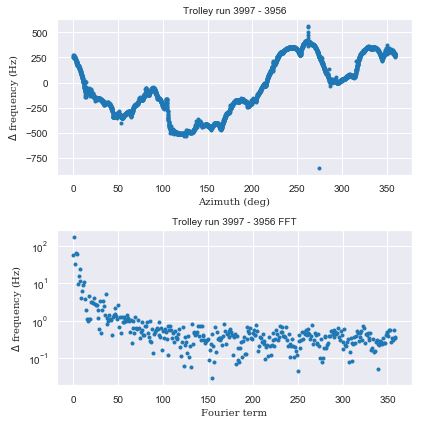

In [32]:
tr_fft = np.abs(np.fft.fft(tr))/(tr).size
delta_tr_fft = np.abs(np.fft.fft(tr_2 - tr))/(tr_2 - tr).size

fig1, ax1 = plt.subplots(2,1)

ax1[0].plot(phis, tr_2 - tr, '.')

ax1[0].set_xlabel('Azimuth (deg)', fontdict={'family':'serif'})
ax1[0].set_ylabel('$\Delta$ frequency (Hz)', fontdict={'family':'serif'})
ax1[0].set_title(r'Trolley run 3997 - 3956')

ax1[1].semilogy(delta_tr_fft[0:360], '.')

ax1[1].set_xlabel('Fourier term', fontdict={'family':'serif'})
ax1[1].set_ylabel('$\Delta$ frequency (Hz)', fontdict={'family':'serif'})
ax1[1].set_title(r'Trolley run 3997 - 3956 FFT')

fig1.set_size_inches(6,6)
fig1.tight_layout()


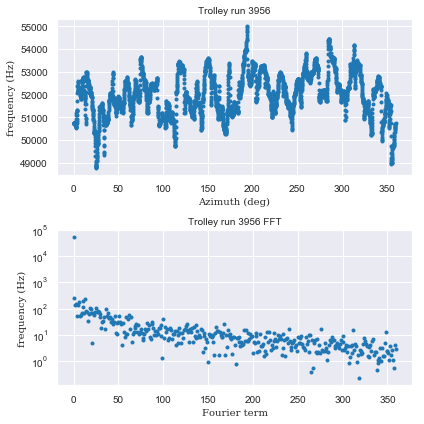

In [33]:


fig2, ax2 = plt.subplots(2,1)

ax2[0].plot(phis, tr, '.')

ax2[0].set_xlabel('Azimuth (deg)', fontdict={'family':'serif'})
ax2[0].set_ylabel('frequency (Hz)', fontdict={'family':'serif'})
ax2[0].set_title(r'Trolley run 3956')

ax2[1].semilogy(tr_fft[0:360], '.')

ax2[1].set_xlabel('Fourier term', fontdict={'family':'serif'})
ax2[1].set_ylabel('frequency (Hz)', fontdict={'family':'serif'})
ax2[1].set_title(r'Trolley run 3956 FFT')

fig2.set_size_inches(6,6)
fig2.tight_layout()

In [34]:
fig1.savefig('trolley_diff_fft.png', dpi=300)
fig2.savefig('trolley_fft.png', dpi=300)